In [1]:
from char_cnn import CharacterLevelCNN

In [2]:
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import pickle
import os
import cv2
import numpy as np

In [27]:
import torch

import cv2
from PIL import Image
def display_image(img):
    plt.imshow(img)
    plt.show()

In [8]:
model = torch.nn.DataParallel(CharacterLevelCNN())

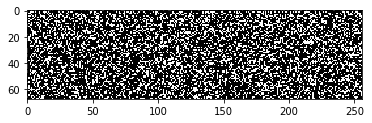

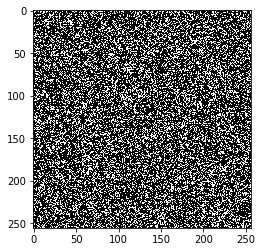

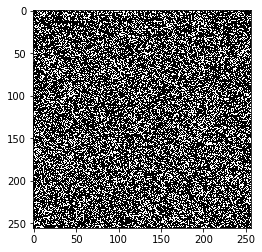

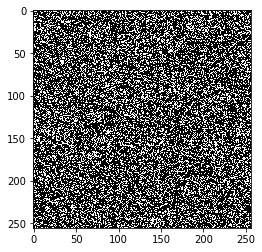

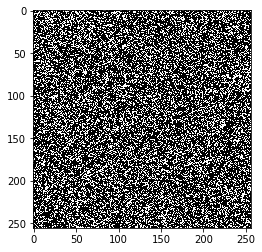

In [544]:
from sklearn.preprocessing import scale



def load_weights(layer, model_file):
    model.load_state_dict(torch.load(model_file, map_location='cpu'))
    name = 'module.conv{}.0.weight'.format(layer)
    return model.state_dict()[name].numpy()
def recreate_image(weights):


#    weights = weights/(weights.max()/255.0)
    #image = (255.0/weights.max())
    a = weights
    e = ((a - np.mean(a)) / np.std(a)) # + 128
#    print(e)
    weights = np.uint8(np.round(e))
    return weights.T

def visualize(layer, model_file):
    w1 = load_weights(layer, model_file)
    w1 = recreate_image(w1)    

#    w2 = load_weights(layer, '../models_trained/w_exp=2_Federator')
#    w2 = recreate_image(w2)    
#    w3 = load_weights(layer, '../models_trained/w_exp=3_Federator')
#    w3 = recreate_image(w3)    
#    print(np.sum(np.subtract(w2, w3)))


    
    
    
    img = cv2.merge((w1[1], w1[1], w1[1]))
#    print(np.var(w1))
    display_image(img)

    
def build_var_row(model_file):
    cells = []
    for layer_num in np.arange(1,6):
        cells.append(np.mean(load_weights(layer_num, model_file)))
    return cells


#visualize(0, '../models_trained/w_exp=1_Federator')
visualize(1, '../models_trained/w_exp=1_Federator')
visualize(2, '../models_trained/w_exp=1_Federator')
visualize(3, '../models_trained/w_exp=1_Federator')
visualize(4, '../models_trained/w_exp=1_Federator')
visualize(5, '../models_trained/w_exp=1_Federator')

#visualize(2, '../models_trained/w_exp=1_Federator')
#visualize(3, '../models_trained/w_exp=3_Federator')

#table = []
#for exp_num in np.arange(0,4):
#    table.append(np.concatenate([[str(exp_num + 1)], build_var_row('../models_trained/w_exp={}_Federator'.format(exp_num))]))
#pd.DataFrame(table, columns=['Experiment', 'Conv1', 'Conv2', 'Conv3', 'Conv4', 'Conv5'])